In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r'dataset\Covid Patient list- Population Data.csv', na_values=[97,98,99])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   566599 non-null  object 
 1   sex                  566602 non-null  int64  
 2   patient_type         566602 non-null  int64  
 3   entry_date           566602 non-null  object 
 4   date_symptoms        566602 non-null  object 
 5   date_died            566602 non-null  object 
 6   intubated            121789 non-null  float64
 7   pneumonia            566591 non-null  float64
 8   age                  566395 non-null  float64
 9   pregnancy            277903 non-null  float64
 10  diabetes             564621 non-null  float64
 11  copd                 564853 non-null  float64
 12  asthma               564850 non-null  float64
 13  inmsupr              564622 non-null  float64
 14  hypertension         564778 non-null  float64
 15  other_disease    

In [17]:
df['date_died'].value_counts()

date_died
9999-99-99    530426
08-06-2020       701
16-06-2020       699
10-06-2020       691
12-06-2020       674
               ...  
25-02-2020         1
21-02-2020         1
13-02-2020         1
13-01-2020         1
12-03-2020         1
Name: count, Length: 124, dtype: int64

In [18]:
df[df['date_died']!='9999-99-99'].index

Index([     4,      5,     24,     36,     41,     45,     50,     67,     69,
           72,
       ...
       566391, 566430, 566431, 566466, 566517, 566548, 566552, 566553, 566578,
       566591],
      dtype='int64', length=36176)

In [19]:
print("Removing data of dead patients")
print("Before dropping:", df.shape)
df.drop(index=df[df['date_died']!='9999-99-99'].index, inplace=True)
print("After dropping:",df.shape)

Removing data of dead patients
Before dropping: (566602, 23)
After dropping: (530426, 23)


In [20]:
print("Removing dates and patient IDs")
print("Before:", len(df.columns))
df.drop(columns=['id','entry_date', 'date_symptoms', 'date_died'], inplace=True)
print("After:", len(df.columns))

Removing dates and patient IDs
Before: 23
After: 19


In [57]:
df.columns

Index(['sex', 'patient_type', 'intubated', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [58]:
print(df.shape)
ser = df.duplicated(subset=['sex', 'patient_type', 'intubated', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu'])
df.drop(index=df.loc[ser].index, inplace=True)
print(df.shape)

(530426, 19)
(53483, 19)


In [59]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(53483, 19)
(53483, 19)


In [60]:
cols = list(df.columns)
for i in cols:
    print(df[i].value_counts())

sex
2    27175
1    26308
Name: count, dtype: int64
patient_type
2    27639
1    25844
Name: count, dtype: int64
intubated
2.0    24451
1.0     3119
Name: count, dtype: int64
pneumonia
2.0    33258
1.0    20214
Name: count, dtype: int64
age
51.0     1025
60.0     1025
50.0     1012
56.0     1011
52.0     1008
         ... 
116.0       1
115.0       1
117.0       1
107.0       1
111.0       1
Name: count, Length: 117, dtype: int64
pregnancy
2.0    24584
1.0     1014
Name: count, dtype: int64
diabetes
2.0    34091
1.0    18222
Name: count, dtype: int64
copd
2.0    46674
1.0     5853
Name: count, dtype: int64
asthma
2.0    46510
1.0     6010
Name: count, dtype: int64
inmsupr
2.0    46705
1.0     5613
Name: count, dtype: int64
hypertension
2.0    30105
1.0    22339
Name: count, dtype: int64
other_disease
2.0    44283
1.0     7571
Name: count, dtype: int64
cardiovascular
2.0    44908
1.0     7562
Name: count, dtype: int64
obesity
2.0    35203
1.0    17303
Name: count, dtype: int64
renal_chr

In [61]:
print(df.head(10))
for i in ['sex', 'patient_type', 'intubated', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']:
       df[i] = df[i].replace({2:0})
       df[i] = pd.Categorical(df[i])
df['covid_res'] = df['covid_res'].replace({3:2})
print(df.head(10))

    sex  patient_type  intubated  ...  contact_other_covid  covid_res  icu
0     2             1        NaN  ...                  2.0          1  NaN
1     2             1        NaN  ...                  NaN          1  NaN
2     1             2        2.0  ...                  NaN          1  2.0
3     2             2        2.0  ...                  NaN          1  2.0
6     2             2        2.0  ...                  NaN          1  2.0
7     1             1        NaN  ...                  1.0          1  NaN
8     1             1        NaN  ...                  NaN          1  NaN
9     1             2        1.0  ...                  NaN          1  2.0
10    1             2        2.0  ...                  NaN          1  2.0
11    1             1        NaN  ...                  NaN          1  NaN

[10 rows x 19 columns]
   sex patient_type intubated  ... contact_other_covid  covid_res  icu
0    0            1       NaN  ...                 0.0          1  NaN
1    0   

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53483 entries, 0 to 566601
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  53483 non-null  category
 1   patient_type         53483 non-null  category
 2   intubated            27570 non-null  category
 3   pneumonia            53472 non-null  category
 4   age                  53382 non-null  float64 
 5   pregnancy            25598 non-null  category
 6   diabetes             52313 non-null  category
 7   copd                 52527 non-null  category
 8   asthma               52520 non-null  category
 9   inmsupr              52318 non-null  category
 10  hypertension         52444 non-null  category
 11  other_disease        51854 non-null  category
 12  cardiovascular       52470 non-null  category
 13  obesity              52506 non-null  category
 14  renal_chronic        52485 non-null  category
 15  tobacco              52

In [63]:
dft=df.dropna()
dft['sex'].value_counts()

sex
1    6822
0       0
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
dX = df.loc[:, ['sex', 'patient_type', 'intubated', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']]
dy = df['covid_res']
dxtr, dte, dytr,dyte = train_test_split(dX,dy,test_size=0.05, random_state=42)

In [65]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
gbm = HistGradientBoostingClassifier(learning_rate=0.19)
gbm.fit(dxtr,dytr)
dyp = gbm.predict(dte)
print(len(dyte[dyte==1]), '\t', len(dyte[dyte==2]))
print(accuracy_score(y_pred=dyp,y_true=dyte))
print(classification_report(y_pred=dyp,y_true=dyte))
print(confusion_matrix(y_pred=dyp,y_true=dyte))

1494 	 1181
0.6471028037383177
              precision    recall  f1-score   support

           1       0.67      0.73      0.70      1494
           2       0.61      0.54      0.58      1181

    accuracy                           0.65      2675
   macro avg       0.64      0.64      0.64      2675
weighted avg       0.64      0.65      0.64      2675

[[1088  406]
 [ 538  643]]


In [66]:
from sklearn.model_selection import train_test_split
dXt = dft.loc[:, ['sex', 'patient_type', 'pneumonia','diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic','tobacco']]
dyt = dft['covid_res']
dtxtr, dtxte, dtytr,dtyte = train_test_split(dX,dy,test_size=0.05, random_state=42)

In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
gbm = HistGradientBoostingClassifier(learning_rate=0.12)
gbm.fit(dtxtr,dtytr)
dtyp = gbm.predict(dtxte)
print(len(dtyte[dtyte==1]), '\t', len(dtyte[dtyte==2]))
print(accuracy_score(y_pred=dtyp,y_true=dtyte))
print(classification_report(y_pred=dtyp,y_true=dtyte))
print(confusion_matrix(y_pred=dtyp,y_true=dtyte))

1494 	 1181
0.6471028037383177
              precision    recall  f1-score   support

           1       0.67      0.72      0.69      1494
           2       0.61      0.56      0.58      1181

    accuracy                           0.65      2675
   macro avg       0.64      0.64      0.64      2675
weighted avg       0.64      0.65      0.65      2675

[[1071  423]
 [ 521  660]]


In [68]:
op = pd.DataFrame(df.loc[df['patient_type']==1])
op.drop(columns=['icu', 'intubated', 'patient_type'], inplace=True)
print(op.info())
print(op['covid_res'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 25844 entries, 0 to 566601
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  25844 non-null  category
 1   pneumonia            25834 non-null  category
 2   age                  25795 non-null  float64 
 3   pregnancy            12987 non-null  category
 4   diabetes             25084 non-null  category
 5   copd                 25213 non-null  category
 6   asthma               25214 non-null  category
 7   inmsupr              25088 non-null  category
 8   hypertension         25166 non-null  category
 9   other_disease        24881 non-null  category
 10  cardiovascular       25204 non-null  category
 11  obesity              25226 non-null  category
 12  renal_chronic        25197 non-null  category
 13  tobacco              25125 non-null  category
 14  contact_other_covid  17643 non-null  category
 15  covid_res            25

In [69]:
hos = pd.DataFrame(df.loc[df['patient_type']==0])
hos.drop(columns=['patient_type'], inplace=True)
print(hos.info())
print(hos['covid_res'].value_counts())
print(hos['icu'].value_counts())
print(hos['intubated'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 27639 entries, 2 to 566593
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  27639 non-null  category
 1   intubated            27570 non-null  category
 2   pneumonia            27638 non-null  category
 3   age                  27587 non-null  float64 
 4   pregnancy            12611 non-null  category
 5   diabetes             27229 non-null  category
 6   copd                 27314 non-null  category
 7   asthma               27306 non-null  category
 8   inmsupr              27230 non-null  category
 9   hypertension         27278 non-null  category
 10  other_disease        26973 non-null  category
 11  cardiovascular       27266 non-null  category
 12  obesity              27280 non-null  category
 13  renal_chronic        27288 non-null  category
 14  tobacco              27264 non-null  category
 15  contact_other_covid  15

In [70]:
mop = pd.DataFrame(op.loc[op['sex']==0])
fop = pd.DataFrame(op.loc[op['sex']==1])
mop.drop(columns=['pregnancy','sex'], inplace=True)
fop.drop(columns=['sex'], inplace=True)
fop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13573 entries, 7 to 566513
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pneumonia            13568 non-null  category
 1   age                  13541 non-null  float64 
 2   pregnancy            12987 non-null  category
 3   diabetes             13178 non-null  category
 4   copd                 13246 non-null  category
 5   asthma               13239 non-null  category
 6   inmsupr              13172 non-null  category
 7   hypertension         13220 non-null  category
 8   other_disease        13060 non-null  category
 9   cardiovascular       13229 non-null  category
 10  obesity              13249 non-null  category
 11  renal_chronic        13230 non-null  category
 12  tobacco              13214 non-null  category
 13  contact_other_covid  9265 non-null   category
 14  covid_res            13573 non-null  int64   
dtypes: category(13), float6

In [71]:
mhos = pd.DataFrame(hos.loc[hos['sex']==0.0])
fhos = pd.DataFrame(hos.loc[hos['sex']==1.0])
mhos.drop(columns=['pregnancy','sex'], inplace=True)
fhos.drop(columns=['sex'], inplace=True)
fhos['pregnancy'].value_counts()

pregnancy
0.0    12147
1.0      464
Name: count, dtype: int64

In [72]:
print(mop.shape)
#mop.dropna(inplace=True)
#print(mop.shape)
print(fop.shape)
#fop.dropna(inplace=True)
#print(fop.shape)
print(mhos.shape)
#mhos.dropna(inplace=True)
#print(mhos.shape)
print(fhos.shape)
#fhos.dropna(inplace=True)
#print(fhos.shape)

(12271, 14)
(13573, 15)
(14904, 16)
(12735, 17)


In [73]:
fhos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12735 entries, 2 to 566593
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   intubated            12706 non-null  category
 1   pneumonia            12735 non-null  category
 2   age                  12709 non-null  float64 
 3   pregnancy            12611 non-null  category
 4   diabetes             12589 non-null  category
 5   copd                 12627 non-null  category
 6   asthma               12622 non-null  category
 7   inmsupr              12593 non-null  category
 8   hypertension         12618 non-null  category
 9   other_disease        12486 non-null  category
 10  cardiovascular       12607 non-null  category
 11  obesity              12606 non-null  category
 12  renal_chronic        12620 non-null  category
 13  tobacco              12598 non-null  category
 14  contact_other_covid  7203 non-null   category
 15  covid_res            12

In [74]:
print(mop['covid_res'].value_counts())
print(fop['covid_res'].value_counts())
print(fhos['covid_res'].value_counts())
print(mhos['covid_res'].value_counts())

covid_res
1    7131
2    5140
Name: count, dtype: int64
covid_res
1    7442
2    6131
Name: count, dtype: int64
covid_res
1    6823
2    5912
Name: count, dtype: int64
covid_res
1    8560
2    6344
Name: count, dtype: int64


In [75]:
X = mop.loc[:, ['pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12271 entries, 0 to 566601
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pneumonia            12266 non-null  category
 1   age                  12254 non-null  float64 
 2   diabetes             11906 non-null  category
 3   copd                 11967 non-null  category
 4   asthma               11975 non-null  category
 5   inmsupr              11916 non-null  category
 6   hypertension         11946 non-null  category
 7   other_disease        11821 non-null  category
 8   cardiovascular       11975 non-null  category
 9   obesity              11977 non-null  category
 10  renal_chronic        11967 non-null  category
 11  tobacco              11911 non-null  category
 12  contact_other_covid  8378 non-null   category
dtypes: category(12), float64(1)
memory usage: 337.0 KB


In [76]:
from sklearn.decomposition import PCA
pca1 = PCA(2)
pcaX = pca1.fit_transform(X)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

1 . pneumonia
2 . age
3 . diabetes
4 . copd
5 . asthma
6 . inmsupr
7 . hypertension
8 . other_disease
9 . cardiovascular
10 . obesity
11 . renal_chronic
12 . tobacco
13 . contact_other_covid


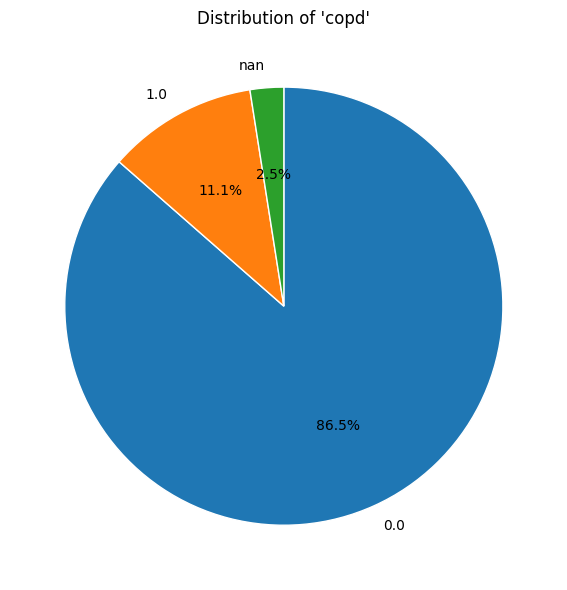

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie(df: pd.DataFrame, column: str, title: str = None, figsize=(6,6)):
    """
    Plots a pie chart of the value counts of a specified DataFrame column.
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    column : str
        The name of the column to plot.
    title : str, optional
        Title for the chart; if None, uses the column name.
    figsize : tuple, optional
        Figure size passed to matplotlib (width, height).
    """
    
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    
    counts = df[column].value_counts(dropna=False)
    
    
    fig, ax = plt.subplots(figsize=figsize)
    counts.plot.pie(
        ax=ax,
        autopct='%1.1f%%',    
        startangle=90,        
        counterclock=False,   
        wedgeprops={'edgecolor': 'white'}
    )
    
    ax.set_ylabel('')  
    ax.set_title(title or f"Distribution of '{column}'")
    plt.tight_layout()
    plt.show()
X = pd.DataFrame(X, columns=['pneumonia', 'age',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid'])
cols = list(X.columns)
for idx, col in enumerate(cols):
    print(idx+1,'.', col)
col = int(input('Enter index of column:'))
plot_pie(X,cols[col-1])

In [78]:
mop['covid_res'].replace({3:2}, inplace=True)
mop['covid_res'].value_counts()

C:\Users\Avita\AppData\Local\Temp\ipykernel_3608\2450609283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mop['covid_res'].replace({3:2}, inplace=True)


covid_res
1    7131
2    5140
Name: count, dtype: int64

In [79]:
mop.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12271 entries, 0 to 12270
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pneumonia            12266 non-null  category
 1   age                  12254 non-null  float64 
 2   diabetes             11906 non-null  category
 3   copd                 11967 non-null  category
 4   asthma               11975 non-null  category
 5   inmsupr              11916 non-null  category
 6   hypertension         11946 non-null  category
 7   other_disease        11821 non-null  category
 8   cardiovascular       11975 non-null  category
 9   obesity              11977 non-null  category
 10  renal_chronic        11967 non-null  category
 11  tobacco              11911 non-null  category
 12  contact_other_covid  8378 non-null   category
dtypes: category(12), float64(1)
memory usage: 241.2 KB


In [80]:
df1 = pd.concat([pd.DataFrame(pcaX,columns=['0','1']),mop['covid_res']], axis=1)
df1.head()

NameError: name 'pcaX' is not defined

In [81]:
sns.scatterplot(df1,x='0', y='1', hue='covid_res')
plt.show()

NameError: name 'df1' is not defined

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(X, mop['covid_res'], test_size=0.2, random_state=42)

In [84]:
from sklearn.ensemble import HistGradientBoostingClassifier
gbm = HistGradientBoostingClassifier(learning_rate=0.05)
print(xtrain.columns)
gbm.fit(xtrain,ytrain)
yp = gbm.predict(xtest)
print(accuracy_score(y_pred=yp, y_true=ytest))
print(confusion_matrix(y_pred=yp, y_true=ytest))
print(classification_report(y_pred=yp, y_true=ytest))

Index(['pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid'],
      dtype='object')
0.675356415478615
[[1056  381]
 [ 416  602]]
              precision    recall  f1-score   support

           1       0.72      0.73      0.73      1437
           2       0.61      0.59      0.60      1018

    accuracy                           0.68      2455
   macro avg       0.66      0.66      0.66      2455
weighted avg       0.67      0.68      0.67      2455



In [85]:
mop2 = mop.copy()
mop2.dropna(inplace=True, ignore_index=True)
mop2.shape

(7676, 14)

In [86]:
mop2.reset_index(drop=True, inplace=True)

In [87]:
X2 = mop2.loc[:, ['pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']]
xtr, xte, ytr, yte = train_test_split(X2, mop2['covid_res'], test_size=0.15, random_state=42)

In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
gbm2 = HistGradientBoostingClassifier(learning_rate=0.1, categorical_features='from_dtype')
print(xtr.columns)
gbm2.fit(xtr,ytr)
yp = gbm2.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

Index(['pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid'],
      dtype='object')
0.6875
[[485 183]
 [177 307]]
              precision    recall  f1-score   support

           1       0.73      0.73      0.73       668
           2       0.63      0.63      0.63       484

    accuracy                           0.69      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.69      0.69      0.69      1152



In [89]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtr, ytr)
yp = svm.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

0.5824652777777778
[[652  16]
 [465  19]]
              precision    recall  f1-score   support

           1       0.58      0.98      0.73       668
           2       0.54      0.04      0.07       484

    accuracy                           0.58      1152
   macro avg       0.56      0.51      0.40      1152
weighted avg       0.57      0.58      0.45      1152



In [90]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight='balanced')
log.fit(xtr,ytr)
yp = log.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

0.6710069444444444
[[467 201]
 [178 306]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       668
           2       0.60      0.63      0.62       484

    accuracy                           0.67      1152
   macro avg       0.66      0.67      0.66      1152
weighted avg       0.67      0.67      0.67      1152



In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(xtr,ytr)
yp = rf.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

0.6362847222222222
[[459 209]
 [210 274]]
              precision    recall  f1-score   support

           1       0.69      0.69      0.69       668
           2       0.57      0.57      0.57       484

    accuracy                           0.64      1152
   macro avg       0.63      0.63      0.63      1152
weighted avg       0.64      0.64      0.64      1152



In [ ]:
import pickle as pkl
#pkl.dump(gbm, open('model/gbm.pkl', 'wb'))

In [104]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', HistGradientBoostingClassifier(learning_rate=0.1,max_iter=150, categorical_features='from_dtype'))
])
scores = cross_val_score(pipeline, X2, mop2['covid_res'], cv=skf, scoring='f1')
print(scores.mean())
print(scores)
acc_scores = cross_val_score(pipeline, X2, mop2['covid_res'], cv=skf, scoring='accuracy')
print(acc_scores.mean())
print(acc_scores)

0.7211143544086218
[0.73478504 0.72194021 0.73802817 0.69121813 0.71960022]
0.6765223771715526
[0.69075521 0.67882736 0.6970684  0.64495114 0.67100977]


In [105]:
mop2[mop2['covid_res']==1].head()

,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [106]:
mop2[mop2['covid_res']==2].head()

,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
4454,0.0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
4455,0.0,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4456,0.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4457,1.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4458,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2


In [102]:
X2.count()

pneumonia              7676
age                    7676
diabetes               7676
copd                   7676
asthma                 7676
inmsupr                7676
hypertension           7676
other_disease          7676
cardiovascular         7676
obesity                7676
renal_chronic          7676
tobacco                7676
contact_other_covid    7676
dtype: int64

In [ ]:
pipeline.fit(X2,mop2['covid_res'])
#pkl.dump(pipeline, open('model/mop_pl.pkl', 'wb'))
#final model

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(criterion='entropy'))
])
scores = cross_val_score(pipeline, X2, mop2['covid_res'], cv=skf, scoring='f1')
print(scores.mean())
print(scores)
acc_scores = cross_val_score(pipeline, X2, mop2['covid_res'], cv=skf, scoring='accuracy')
print(acc_scores.mean())
print(acc_scores)

0.6940393172570415
[0.68850698 0.69676049 0.67807487 0.70600858 0.70084567]
0.6409128074813408
[0.63074984 0.64713296 0.62192817 0.66162571 0.64312736]


In [ ]:
pipeline.fit(X2,mop2['covid_res'])
#pkl.dump(pipeline, open('model/mop_pl.pkl', 'wb'))
#final model

FOP model

In [108]:
fop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13573 entries, 7 to 566513
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pneumonia            13568 non-null  category
 1   age                  13541 non-null  float64 
 2   pregnancy            12987 non-null  category
 3   diabetes             13178 non-null  category
 4   copd                 13246 non-null  category
 5   asthma               13239 non-null  category
 6   inmsupr              13172 non-null  category
 7   hypertension         13220 non-null  category
 8   other_disease        13060 non-null  category
 9   cardiovascular       13229 non-null  category
 10  obesity              13249 non-null  category
 11  renal_chronic        13230 non-null  category
 12  tobacco              13214 non-null  category
 13  contact_other_covid  9265 non-null   category
 14  covid_res            13573 non-null  int64   
dtypes: category(13), float6

In [109]:
fop.columns

Index(['pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')

In [110]:
fop_X = fop.loc[:, ['pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']]
fop2 = fop.dropna()
fop2_X = fop2.loc[:, ['pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']]

In [112]:
fop2[fop2['covid_res']==2].head()

,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
220703,0.0,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
220710,0.0,41.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2
220775,1.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
220843,1.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
220944,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2


In [113]:
fop2[fop2['covid_res']==1].head()

,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
7,0.0,56.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
13,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
15,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
16,0.0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
29,1.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
xtr,xte,ytr,yte = train_test_split(fop_X, fop['covid_res'], test_size=0.2, random_state=42)
xtr2,xte2,ytr2,yte2 = train_test_split(fop2_X, fop2['covid_res'], test_size=0.2, random_state=42)


In [ ]:
fop_hgbc = HistGradientBoostingClassifier(learning_rate=0.05, max_iter=150, class_weight='balanced', categorical_features='from_dtype')
fop_hgbc.fit(xtr, ytr)
yp = fop_hgbc.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

0.657347670250896
[[894 681]
 [275 940]]
              precision    recall  f1-score   support

           1       0.76      0.57      0.65      1575
           2       0.58      0.77      0.66      1215

    accuracy                           0.66      2790
   macro avg       0.67      0.67      0.66      2790
weighted avg       0.68      0.66      0.66      2790



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf.fit(xtr2, ytr2)
yp = rf.predict(xte2)
print(accuracy_score(y_pred=yp, y_true=yte2))
print(confusion_matrix(y_pred=yp, y_true=yte2))
print(classification_report(y_pred=yp, y_true=yte2))

0.6336336336336337
[[628 317]
 [293 427]]
              precision    recall  f1-score   support

           1       0.68      0.66      0.67       945
           2       0.57      0.59      0.58       720

    accuracy                           0.63      1665
   macro avg       0.63      0.63      0.63      1665
weighted avg       0.64      0.63      0.63      1665



In [ ]:
pkl.dump(pipeline, open('model/fop_rf.pkl', 'wb'))

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', HistGradientBoostingClassifier(learning_rate=0.08,max_iter=150, class_weight='balanced', categorical_features='from_dtype'))
])
scores = cross_val_score(pipeline, fop2_X, fop2['covid_res'], cv=skf, scoring='f1')
print(scores.mean())
print(scores)
acc_scores = cross_val_score(pipeline, fop2_X, fop2['covid_res'], cv=skf, scoring='accuracy')
print(acc_scores.mean())
print(acc_scores)

0.7015539643607283
[0.70279146 0.70991957 0.7076412  0.69106566 0.69635193]
0.669269967082467
[0.67387387 0.67487981 0.68269231 0.65504808 0.65985577]


In [ ]:
pipeline.fit(fop2_X,fop2['covid_res'])
#pkl.dump(pipeline, open('model/fop_pl.pkl', 'wb'))
#final_model

Mhos model training

In [114]:
mhos.dropna(inplace=True)
mhos['covid_res'].value_counts()

covid_res
1    4854
2    3347
Name: count, dtype: int64

In [115]:
mhos.columns

Index(['intubated', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [116]:
mhos_X = mhos.loc[:, ['intubated', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'icu']]

In [117]:
mhos[mhos['covid_res']==1].head()

,intubated,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
108,1.0,1.0,67.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.0
113,0.0,1.0,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
150,0.0,1.0,80.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
243,0.0,1.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
310,0.0,1.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0


In [118]:
mhos[mhos['covid_res']==2].head()

,intubated,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
220700,1.0,1.0,68.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2,1.0
220870,0.0,1.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
221062,0.0,0.0,55.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2,0.0
221438,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0.0
221462,0.0,0.0,62.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', HistGradientBoostingClassifier(learning_rate=0.01,max_iter=200, class_weight='balanced', categorical_features='from_dtype'))
])
scores = cross_val_score(pipeline, mhos_X, mhos['covid_res'], cv=skf, scoring='f1')
print(scores.mean())
print(scores)
acc_scores = cross_val_score(pipeline, mhos_X, mhos['covid_res'], cv=skf, scoring='accuracy')
print(acc_scores.mean())
print(acc_scores)

0.7937941362025074
[0.80415225 0.79586207 0.79134138 0.78986272 0.78775226]
0.712347486578819
[0.71986335 0.71400683 0.71059053 0.71107857 0.70619815]


In [ ]:
pipeline.fit(mhos_X,mhos['covid_res'])
pkl.dump(pipeline, open('model/mhos_pl.pkl', 'wb'))
#final_model

FHos 

In [119]:
fhos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12735 entries, 2 to 566593
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   intubated            12706 non-null  category
 1   pneumonia            12735 non-null  category
 2   age                  12709 non-null  float64 
 3   pregnancy            12611 non-null  category
 4   diabetes             12589 non-null  category
 5   copd                 12627 non-null  category
 6   asthma               12622 non-null  category
 7   inmsupr              12593 non-null  category
 8   hypertension         12618 non-null  category
 9   other_disease        12486 non-null  category
 10  cardiovascular       12607 non-null  category
 11  obesity              12606 non-null  category
 12  renal_chronic        12620 non-null  category
 13  tobacco              12598 non-null  category
 14  contact_other_covid  7203 non-null   category
 15  covid_res            12

In [120]:
fhos.dropna(inplace=True)
fhos['covid_res'].value_counts()

covid_res
1    3754
2    3068
Name: count, dtype: int64

In [121]:
fhos.columns

Index(['intubated', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [122]:
fhos_X = fhos.loc[:, ['intubated', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'icu']]

In [123]:
xtr,xte,ytr,yte = train_test_split(fhos_X,fhos['covid_res'], test_size=0.2, random_state=42)

In [124]:
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(xtr,ytr)
yp = rf.predict(xte)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

0.6153846153846154
[[503 268]
 [257 337]]
              precision    recall  f1-score   support

           1       0.66      0.65      0.66       771
           2       0.56      0.57      0.56       594

    accuracy                           0.62      1365
   macro avg       0.61      0.61      0.61      1365
weighted avg       0.62      0.62      0.62      1365



In [125]:
fop_hgbc = HistGradientBoostingClassifier(learning_rate=0.05, max_iter=150, class_weight='balanced', categorical_features='from_dtype')
fop_hgbc.fit(xtr, ytr)
yp = fop_hgbc.predict(xte)
print(np.where(ytr==2))
print(xtr)
print(accuracy_score(y_pred=yp, y_true=yte))
print(confusion_matrix(y_pred=yp, y_true=yte))
print(classification_report(y_pred=yp, y_true=yte))

(array([   1,    2,    4, ..., 5453, 5454, 5455]),)
       intubated pneumonia   age  ... tobacco contact_other_covid  icu
112580       0.0       1.0  52.0  ...     0.0                 0.0  0.0
265075       0.0       0.0  11.0  ...     0.0                 0.0  0.0
534215       0.0       0.0  39.0  ...     0.0                 0.0  0.0
69321        0.0       0.0  94.0  ...     0.0                 0.0  0.0
327148       0.0       1.0  74.0  ...     1.0                 1.0  0.0
...          ...       ...   ...  ...     ...                 ...  ...
228296       0.0       0.0  62.0  ...     0.0                 0.0  1.0
374553       0.0       0.0  10.0  ...     0.0                 0.0  0.0
379118       0.0       1.0  53.0  ...     0.0                 0.0  0.0
398212       0.0       0.0  60.0  ...     1.0                 0.0  0.0
29513        0.0       1.0  78.0  ...     0.0                 0.0  0.0

[5457 rows x 16 columns]
0.6622710622710622
[[505 266]
 [195 399]]
              precision    r

In [131]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', HistGradientBoostingClassifier(learning_rate=0.03,max_iter=350, class_weight='balanced', categorical_features='from_dtype'))
])
scores = cross_val_score(pipeline, fhos_X, fhos['covid_res'], cv=skf, scoring='f1')
print(scores.mean())
print(scores)
acc_scores = cross_val_score(pipeline, fhos_X, fhos['covid_res'], cv=skf, scoring='accuracy')
print(acc_scores.mean())
print(acc_scores)

0.7051486923899303
[0.72025723 0.69749009 0.70065359 0.71901363 0.68832891]
0.6695973918554563
[0.68131868 0.66446886 0.66422287 0.68255132 0.65542522]


In [132]:
pipeline.fit(fhos_X,fhos['covid_res'])
pkl.dump(pipeline, open("model/fhos_pl.pkl", "wb"))